# Linear models for multiclass classification

Many linear classification models are for binary classification only, and don’t extend naturally to the multiclass case (with the exception of logistic regression). A common technique to extend a binary classification algorithm to a multiclass classification algorithm is the one-vs.-rest approach. In the one-vs.-rest approach, a binary model is learned for each class that tries to separate that class from all of the other classes, resulting in as many binary models as there are classes. To make a prediction, all binary classifiers are run on a test point. The classifier that has the highest score on its single class “wins,” and this class label is returned as the prediction.

Let's apply one-vs-rest:-

In [15]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import mglearn
import numpy as np

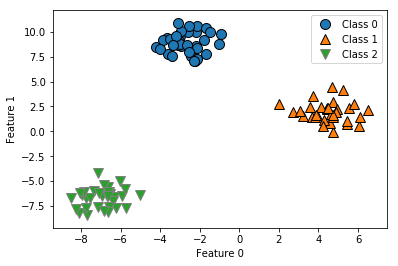

In [7]:
import mglearn
X,y=make_blobs(random_state=42)
mglearn.discrete_scatter(X[: , 0],X[: ,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0','Class 1','Class 2'])

   Two dimensional toy dataset containing three classes

In [14]:
# Train a LinearSVC classifier on the dataset
from sklearn.svm import LinearSVC

linear_svc=LinearSVC().fit(X,y)
print('Coefficient shape: {}'.format(linear_svc.coef_.shape))
print('Intecept shape: {}'.format(linear_svc.intercept_.shape))

Coefficient shape: (3, 2)
Intecept shape: (3,)


We see that the shape of the coef_ is (3, 2), meaning that each row of coef_ contains the coefficient vector for one of the three classes and each column holds the coefficient value for a specific feature (there are two in this dataset). The intercept_ is now a one-dimensional array, storing the intercepts for each class. 

Let’s visualize the lines given by the three binary classifiers:-

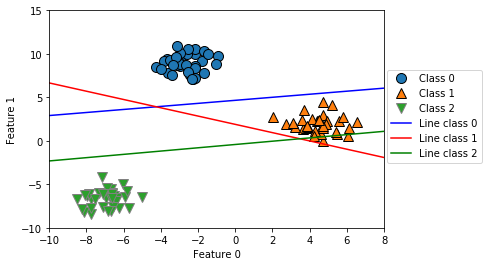

In [19]:
mglearn.discrete_scatter(X[: ,0], X[: ,1],y)
line=np.linspace(-15,15)
for coef,intercept,color in zip(linear_svc.coef_,linear_svc.intercept_,['b','r','g']):
    plt.plot(line, -(line * coef[0]+intercept/coef[1]),c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0','Class 1','Class 2','Line class 0','Line class 1','Line class 2'], loc=(1.01,0.3))

Text(0,0.5,'Feature 1')

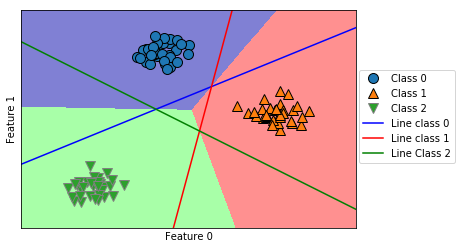

In [40]:
mglearn.plots.plot_2d_classification(linear_svc,X, fill=True, alpha=.5)
mglearn.discrete_scatter(X[: ,0],X[: ,1],y)
line =np.linspace(-15,15)
for coef,intercept,color in zip(linear_svc.coef_,linear_svc.intercept_,['b','r','g']):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.legend(['Class 0','Class 1','Class 2','Line class 0','Line class 1','Line Class 2'],loc=(1.01,0.3))
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')